In [199]:
#Importing library
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
#loading data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [201]:
#checking the shape
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [202]:
#concatinating the Training and Test  by rows
df = pd.concat([df_train,df_test],axis = 0)

In [203]:
df.shape

(2919, 81)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

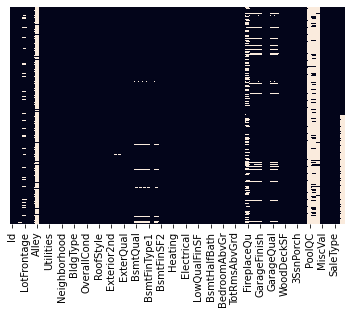

In [205]:
#dealing with missing values
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [206]:
df["Alley"].isna().sum()

2721

In [207]:
df.drop(["Alley"],axis = 1,inplace = True)

In [208]:
df["Fence"].isna().sum()

2348

In [209]:
df.drop(["Fence"],axis = 1,inplace = True)

In [210]:
df["MiscFeature"].isna().sum()

2814

In [211]:
df.drop(["MiscFeature"],axis = 1,inplace = True)

In [212]:
df["PoolQC"].isna().sum()

2909

In [213]:
df.drop(["PoolQC"],axis = 1,inplace = True)

In [214]:
df.drop(['SalePrice'],axis = 1,inplace = True)

In [215]:
df.drop(['Id'],axis = 1,inplace = True)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

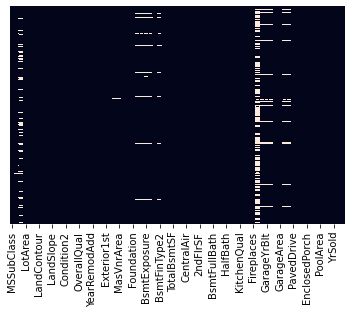

In [217]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [218]:
df['FireplaceQu'].isnull().sum()

1420

In [219]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1454    NaN
1455    NaN
1456     TA
1457    NaN
1458     TA
Name: FireplaceQu, Length: 2919, dtype: object

In [220]:
#selecting all the numberic column
list_num_col = list(df.select_dtypes(exclude = 'object').columns)

In [221]:
#selecting all the object column
list_obj_col = list(df.select_dtypes(include = 'object').columns)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [223]:
df['OverallCond'].isnull().sum()

0

In [224]:
df['OverallQual'].isnull().sum()

0

In [225]:
#This is the function which deals with all fill the categorical value, and with numberic value
def fillna_all(dataframe):
    for col in list_obj_col:
        df[col].fillna(value = df[col].mode()[0],inplace = True)
    for col in list_num_col:
        df[col].fillna(value = df[col].mean(),inplace = True)

In [226]:
#implementing the fucntion
fillna_all(df)

In [227]:
#checking again
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

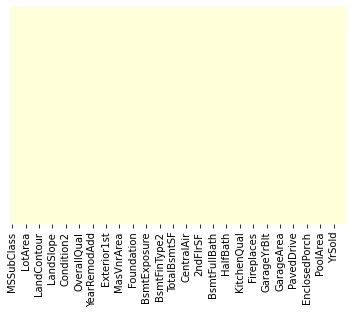

In [228]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'YlGnBu')

In [229]:
df[list_obj_col]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [230]:
len(list_obj_col)

39

In [231]:
df.dropna(inplace=True)

In [232]:
#doing the oneHotEncoding for object column
dummy = pd.get_dummies(df[list_obj_col],drop_first = True)

In [233]:
dummy.shape

(2919, 200)

In [234]:
#concating the the dummy variable 
df = pd.concat([df,dummy],axis = 1)

In [235]:
df.shape

(2919, 275)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 275 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), object(39), uint8(200)
memory usage: 2.2+ MB


In [237]:
df.loc[:,~df.columns.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,0,0
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,0,0
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [238]:
df.shape

(2919, 275)

In [239]:
#droping the column which has used for creating the dummy variable
df.drop(df[list_obj_col],axis = 1,inplace = True)

In [240]:
df.shape

(2919, 236)

In [241]:
#removing the dublicate
df.loc[:,~df.columns.duplicated()]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [242]:
df.shape

(2919, 236)

In [243]:
#Spliting into the traing and testing
x_train = df.iloc[:1460,:]
x_test = df.iloc[1460:,:]

In [244]:
#seting the dependent variable
y_train = df_train['SalePrice']

In [245]:
y_train.shape

(1460,)

In [246]:
x_train.shape

(1460, 236)

In [247]:
#Linear Regression
clf_linreg = LinearRegression()
clf_linreg.fit(x_train,y_train)
y_pred_Linreg = clf_linreg.predict(x_test)
acc_LinReg = round(clf_linreg.score(x_train,y_train)*100,2)
print("Linear Reg :" +str(acc_LinReg))

Linear Reg :93.06


In [248]:
#Support Vector Machines
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(x_train,y_train)
acc_svm = round(clf_svm.score(x_train,y_train)*100,2)
print("SVM:" +str(acc_svm))

SVM:2.05


In [249]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 3)
clf_knn.fit(x_train,y_train)
acc_knn = round(clf_knn.score(x_train,y_train)*100,2)
print("knn:"+str(acc_knn))

knn:33.9


In [250]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x_train,y_train)
acc_gnb = round(clf_gnb.score(x_train,y_train)*100,2)
print("GNB:"+str(acc_gnb))

GNB:74.45


In [251]:
from sklearn.linear_model import LinearRegression, RidgeCV,Lasso
#Lasso Linear Regression
clf_lasso = Lasso(alpha = 1.0,max_iter = 1000)
clf_lasso.fit(x_train,y_train)
acc_lasso = round(clf_lasso.score(x_train,y_train)*100,2)
print("Lasso:"+str(acc_lasso))

Lasso:93.05


/mnt/homes4celsrs/anushasa10/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317045720605.76105, tolerance: 920791133.4609975
  positive)


In [252]:
#Ridge Regression
clf_ridge = RidgeCV(alphas = (0.1,1.0,10.0))
clf_ridge.fit(x_train,y_train)
acc_ridge = round(clf_ridge.score(x_train,y_train)*100,2)
print("Ridge Regression:"+str(acc_ridge))

Ridge Regression:89.47


In [253]:
import xgboost
regressor=xgboost.XGBRegressor()

##Hyper Parameter Optimization
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight =[1,2,3,4]
base_score=[0.25,0.5,0.75,1]


#Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
}

In [254]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [255]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  5.6min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [256]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [135]:
regressor.fit(x_train,y_train)
regressor.score(x_train,y_train)

[22:37:46] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:46] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:37:50] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.9836597667973431

In [192]:
#predicting the sale price
y_pred = regressor.predict(x_test)

In [193]:
#converting it into the dataframe
pred = pd.DataFrame(y_pred)

In [ ]:
df = pd.DataFrame({'SalePrice': y_pred})
df["Id"] = df.index+1461
df= df[["Id",'SalePrice']]
df.to_csv("prediction.csv", index = False)